In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.shape

(426880, 26)

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
#issue no.1 there's an empty column ['county'] and alot of null values in many columns
nans= df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques= df.nunique()
noted=pd.concat([nans, pct, uniques, df.dtypes],axis=1)
noted.columns=['null count','null percentage','n unique values',' datatype']

In [11]:
noted.head()

,null count,null percentage,n unique values,datatype
county,426880,100.000000,0,float64
size,306361,71.767476,4,object
cylinders,177678,41.622470,8,object
condition,174104,40.785232,6,object
VIN,161042,37.725356,118264,object


In [15]:
df2 = df.drop(columns=['conty','size'], axis=1)

In [16]:
#dropping culomns that aren't useful in analysis
df2 = df2.drop(columns=['id','url','region_url','VIN','image_url','description', 'lat', 'long','posting_date'])

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  county        0 non-null       float64
 15  state         426880 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


In [21]:
#dropping rows with missing value
df4 = df2
df4.drop(df4[df4['odometer'].isnull()].index,axis = 0,inplace =True)
df4.drop(df4[df4['type'].isnull()].index,axis = 0,inplace =True)
df4.drop(df4[df4['title_status'].isnull()].index,axis = 0,inplace =True)
df4.drop(df4[df4['year'].isnull()].index,axis = 0,inplace =True)
df4.drop(df4[df4['transmission'].isnull()].index,axis = 0,inplace =True)

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321076 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        321076 non-null  object 
 1   price         321076 non-null  int64  
 2   year          321076 non-null  float64
 3   manufacturer  311166 non-null  object 
 4   model         318226 non-null  object 
 5   condition     212833 non-null  object 
 6   cylinders     213017 non-null  object 
 7   fuel          319715 non-null  object 
 8   odometer      321076 non-null  float64
 9   title_status  321076 non-null  object 
 10  transmission  321076 non-null  object 
 11  drive         256472 non-null  object 
 12  type          321076 non-null  object 
 13  paint_color   264745 non-null  object 
 14  county        0 non-null       float64
 15  state         321076 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 41.6+ MB


In [23]:
#filling some other categoral missing values 
df5 = df4.fillna(method='pad')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321076 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        321076 non-null  object 
 1   price         321076 non-null  int64  
 2   year          321076 non-null  float64
 3   manufacturer  321076 non-null  object 
 4   model         321076 non-null  object 
 5   condition     321076 non-null  object 
 6   cylinders     321076 non-null  object 
 7   fuel          321076 non-null  object 
 8   odometer      321076 non-null  float64
 9   title_status  321076 non-null  object 
 10  transmission  321076 non-null  object 
 11  drive         321072 non-null  object 
 12  type          321076 non-null  object 
 13  paint_color   321076 non-null  object 
 14  county        0 non-null       float64
 15  state         321076 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 41.6+ MB


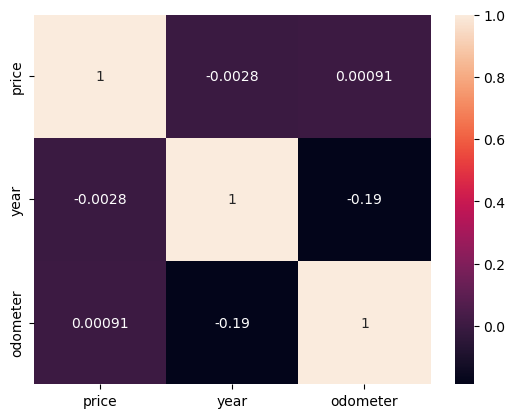

In [31]:
#discovering the correlation between price,year,odometer
sns.heatmap(df5[['price','year','odometer']].corr(),annot =True)
plt.show()

In [34]:
# check what every column have
for col in df5.columns:
    print( col,':', df5[col].nunique())
    print(df5[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

region : 404
region
columbus              3018
jacksonville          2914
washington, DC        2572
sarasota-bradenton    2560
stockton              2530
Name: count, dtype: int64

********************

price : 13086
price
0        24077
29990     2628
25990     2280
7995      2246
6995      2203
Name: count, dtype: int64

********************

year : 108
year
2018.0    30532
2017.0    29862
2015.0    24289
2016.0    24197
2013.0    23480
Name: count, dtype: int64

********************

manufacturer : 42
manufacturer
ford         52526
chevrolet    41097
toyota       27400
honda        16801
jeep         14668
Name: count, dtype: int64

********************

model : 23062
model
f-150             6276
silverado 1500    4017
1500              3186
camry             2328
accord            2219
Name: count, dtype: int64

********************

condition : 6
condition
good         158951
excellent    122951
like new      26766
fair          10041
new            1429
Name: count, dtype: int6

In [45]:
#what manufacturer has the highest prices 
highest_priced_manufacturer = df5.groupby('manufacturer')['price'].max().sort_values(ascending=False).head(5)
print(highest_priced_manufacturer)

manufacturer
toyota    3736928711
jeep      1410065407
ford      1111111111
nissan     135008900
gmc        123456789
Name: price, dtype: int64


In [46]:
#what is the most common condition in a state 
state_condition_counts = df.groupby(['state', 'condition']).size().unstack()
most_common_condition_in_state = state_condition_counts.idxmax(axis=1)
print(most_common_condition_in_state)

state
ak    excellent
al         good
ar         good
az         good
ca    excellent
co         good
ct         good
dc         good
de         good
fl    excellent
ga         good
hi    excellent
ia    excellent
id    excellent
il         good
in         good
ks         good
ky         good
la         good
ma         good
md         good
me    excellent
mi         good
mn         good
mo         good
ms         good
mt    excellent
nc         good
nd    excellent
ne    excellent
nh    excellent
nj         good
nm         good
nv         good
ny         good
oh         good
ok    excellent
or    excellent
pa         good
ri         good
sc         good
sd    excellent
tn         good
tx         good
ut         good
va         good
vt    excellent
wa    excellent
wi         good
wv         good
wy         good
dtype: object


In [48]:
#what is the most used type in a region
type_used_in_region = df.groupby(['type', 'region']).size().unstack()
most_common_type_in_region = type_used_in_region.idxmax(axis=1)
print(most_common_type_in_region)

type
SUV                          bellingham
bus                     charlottesville
convertible                palm springs
coupe             ft myers / SW florida
hatchback                   SF bay area
mini-van                      milwaukee
offroad              anchorage / mat-su
other                          hartford
pickup                      san antonio
sedan                          columbus
truck          kennewick-pasco-richland
van                  sarasota-bradenton
wagon                            denver
dtype: object


In [50]:
#most used colors in order
color_counts = df5['paint_color'].value_counts()
sorted_color_counts = color_counts.sort_values(ascending=False)
print(sorted_color_counts)

paint_color
white     83920
black     68885
silver    46845
blue      34194
red       33220
grey      26259
green      7838
brown      7428
custom     7400
yellow     2220
orange     2170
purple      697
Name: count, dtype: int64


In [55]:
#the least sold type for each year 
types_in_year = df5.groupby(['year','type']).size().unstack()
least_types_in_year = types_in_year.idxmin(axis=1)
print(least_types_in_year)

year
1900.0            SUV
1901.0    convertible
1905.0            van
1909.0          other
1910.0    convertible
             ...     
2018.0            bus
2019.0        offroad
2020.0            bus
2021.0       mini-van
2022.0         pickup
Length: 108, dtype: object


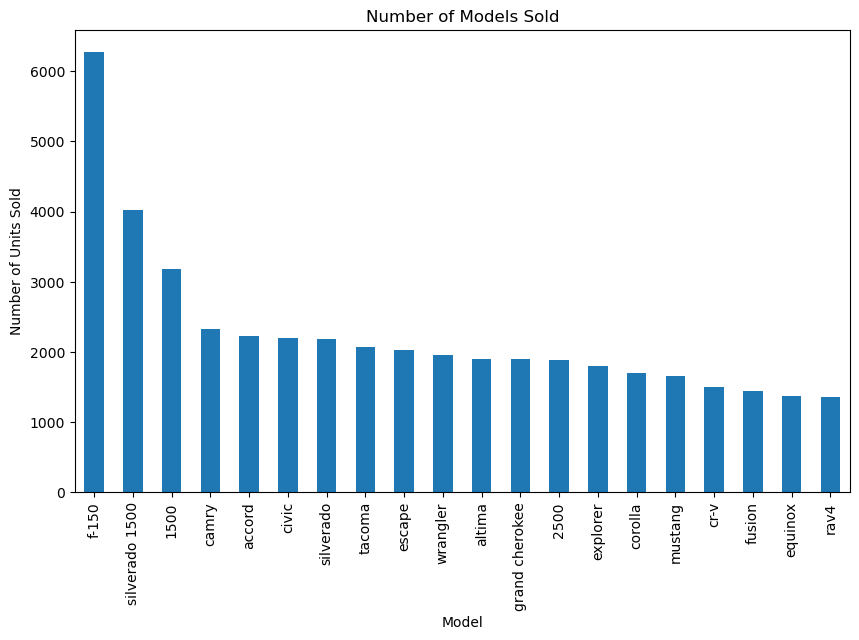

In [58]:
#what is the most bought model
model_counts = df5['model'].value_counts().head(20)
#sorted_model_counts = model_counts.sort_values(ascending=False)
#print(sorted_model_counts)
model_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Models Sold')
plt.xlabel('Model')
plt.ylabel('Number of Sold cars')
plt.show()